### Importing Required Libraries

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
df = pd.read_excel("Telemarketing.xlsx", header=2)
df.head(4)

,Timestamp,Lead Name,Lead Validation,Calling Date & Time,Picked the phone,Reason Why Phone is not picked,Email (Optional),City,Lead Interested or Not,Insert Meeting Date & Time Slot,Please state the major highlights of the call.,Select the Reason
0,2019/11/30 11:59:05 AM GMT+5:30,Naveen Garg,Valid Contact,2019-11-30 10:20:00,Yes,NaN,NaN,Kota,No,NaT,NaN,all read used solar
1,2019/11/23 7:33:23 PM GMT+5:30,Harish,Valid Contact,2019-11-23 12:10:00,Yes,NaN,NaN,Kota,No,NaT,NaN,all ready solar used
2,2019/11/11 4:27:04 PM GMT+5:30,Shubh Hospital,Valid Contact,2019-11-11 16:20:00,Yes,NaN,NaN,Jaipur,No,NaT,NaN,all ready used
3,2019/11/11 4:12:52 PM GMT+5:30,Rukmani Birla Hospital CK Birla,Valid Contact,2019-11-11 15:24:00,Yes,NaN,NaN,Jaipur,No,NaT,NaN,all ready used solar


In [3]:
df.shape

(1570, 12)

In [4]:
df.dtypes

Timestamp                                                 object
Lead Name                                                 object
Lead Validation                                           object
Calling Date & Time                               datetime64[ns]
Picked the phone                                          object
Reason Why Phone is not picked                            object
Email (Optional)                                          object
City                                                      object
Lead Interested or Not                                    object
Insert Meeting Date & Time Slot                   datetime64[ns]
Please state the major highlights of the call.            object
Select the Reason                                         object
dtype: object

In [5]:
pred_cols = df.columns.to_list()

In [6]:
fill_rate_df = pd.DataFrame(df[pred_cols].count()/df.shape[0]*100, columns=['fill_rate'])
fill_rate_df

,fill_rate
Timestamp,100.000000
Lead Name,100.000000
Lead Validation,100.000000
Calling Date & Time,96.624204
Picked the phone,96.624204
Reason Why Phone is not picked,35.923567
Email (Optional),0.254777
City,100.000000
Lead Interested or Not,46.751592
Insert Meeting Date & Time Slot,4.840764


**Learnings**
- `Email` feature has the lowest fill rate, which is 0.25%
- `Lead Name` is has all unique values and would not be of much contribution in the analysis
- Took `Lead Interested` and `Insert Meeting Date & Time Slot` as the target feature to base the analysis on. Considering that, the dataset seems extremely imbalanced.

First Approach:
1. Check if the `Timestamp` = `Calling Date & Time`, if so, use either. Since, `Calling Date & Time` has lower fill rate than `Timestamp`, we can just use `Timestamp` instead.
2. Cols will not be used for EDA:  `Email`, `Lead Name`, `Please state the major highlights of the call.`

In [7]:
df['Timestamp'] = df['Timestamp'].apply(lambda date_time: date_time[:-9])
df['Timestamp']

0       2019/11/30 11:59:05 AM
1        2019/11/23 7:33:23 PM
2        2019/11/11 4:27:04 PM
3        2019/11/11 4:12:52 PM
4        2019/11/11 4:25:38 PM
                 ...          
1565     2019/11/30 7:37:02 PM
1566     2019/11/30 7:39:36 PM
1567     2019/11/30 7:41:09 PM
1568     2019/11/30 7:43:11 PM
1569     2019/11/30 7:48:31 PM
Name: Timestamp, Length: 1570, dtype: object

In [8]:
df['Timestamp'] = df['Timestamp'].apply(lambda date_time: dt.strptime(date_time, '%Y/%m/%d %I:%M:%S %p'))
df['Timestamp']

0      2019-11-30 11:59:05
1      2019-11-23 19:33:23
2      2019-11-11 16:27:04
3      2019-11-11 16:12:52
4      2019-11-11 16:25:38
               ...        
1565   2019-11-30 19:37:02
1566   2019-11-30 19:39:36
1567   2019-11-30 19:41:09
1568   2019-11-30 19:43:11
1569   2019-11-30 19:48:31
Name: Timestamp, Length: 1570, dtype: datetime64[ns]

In [9]:
df['Date'] = df['Timestamp'].dt.date
df['Date']

0       2019-11-30
1       2019-11-23
2       2019-11-11
3       2019-11-11
4       2019-11-11
           ...    
1565    2019-11-30
1566    2019-11-30
1567    2019-11-30
1568    2019-11-30
1569    2019-11-30
Name: Date, Length: 1570, dtype: object

In [10]:
day_of_week = df['Timestamp'].dt.dayofweek

In [11]:
df['Day of Week'] = df['Timestamp'].dt.dayofweek

In [12]:
dates_days_df = pd.DataFrame({'Date': df['Timestamp'].dt.date, 'Day of Week': df['Timestamp'].dt.dayofweek})
dates_days_df

,Date,Day of Week
0,2019-11-30,5
1,2019-11-23,5
2,2019-11-11,0
3,2019-11-11,0
4,2019-11-11,0
...,...,...
1565,2019-11-30,5
1566,2019-11-30,5
1567,2019-11-30,5
1568,2019-11-30,5


In [13]:
dates_days_df['Day of Week'].value_counts()

1    310
0    298
4    275
3    269
5    222
2    196
Name: Day of Week, dtype: int64

Insights
- There has been no calls made on Sunday
- Max calls have been made on Tuesday

In [14]:
df['Time'] = df['Timestamp'].dt.time
df['Time']

0       11:59:05
1       19:33:23
2       16:27:04
3       16:12:52
4       16:25:38
          ...   
1565    19:37:02
1566    19:39:36
1567    19:41:09
1568    19:43:11
1569    19:48:31
Name: Time, Length: 1570, dtype: object

In [15]:
# df['Time_Bucket'] = pd.cut(df['Timestamp'].dt.hour,
#                             bins=[0, 12, 17, 24],
#                             labels=['Morning', 'Noon', 'Evening'],
#                             include_lowest=True,
#                             right=False)

# Optionally, if you want to include 'Night' as well:
df['Time_Bucket'] = pd.cut(df['Timestamp'].dt.hour,
                            bins=[0, 6, 12, 17, 24],
                            labels=['Night', 'Morning', 'Noon', 'Evening'],
                            include_lowest=True,
                            right=False)

# Print the DataFrame with the new 'Time_Bucket' column
print(df[['Time', 'Time_Bucket']])

          Time Time_Bucket
0     11:59:05     Morning
1     19:33:23     Evening
2     16:27:04        Noon
3     16:12:52        Noon
4     16:25:38        Noon
...        ...         ...
1565  19:37:02     Evening
1566  19:39:36     Evening
1567  19:41:09     Evening
1568  19:43:11     Evening
1569  19:48:31     Evening

[1570 rows x 2 columns]


Univariate Analysis:
1. Out of the contact list we have, how many contacts are valid?
2. What % of the contact list picked up the call?
3. Top reasons of not picking up the call and there %
4. What % of lead is interested in solar panels
5. Meeting conversion rate

In [16]:
df['Lead Validation'].value_counts(normalize=True, dropna=False)

Valid Contact      0.966242
Invalid Contact    0.033758
Name: Lead Validation, dtype: float64

In [17]:
df['Lead Validation'] = np.where((df['Lead Validation']=='Valid Contact'), 1, 0)

In [18]:
valid_lead_df = df['Lead Validation'].value_counts(normalize=True).reset_index().rename(columns={'index':'valid_lead', 'Lead Validation': 'ratio'})
valid_lead_df

,valid_lead,ratio
0,1,0.966242
1,0,0.033758


In [19]:
# sns.set_palette("pastel")
# plt.pie(valid_lead_df['ratio'], labels=valid_lead_df['valid_lead'], autopct='%1.1f%%', startangle=90)
# plt.title('Pie Chart for Valid Lead Ratio')
# plt.show()

In [20]:
df['Picked the phone'] = np.where(((df['Picked the phone']=='Yes')|(df['Picked the phone']=='Yes, but mentioned to call later')),  1, 0)

In [21]:
picked_phone_df = df['Picked the phone'].value_counts(normalize=True, dropna=False).reset_index().rename(columns={'index':'phone_picked'
                                                                                                    , 'Picked the phone': 'ratio'})
picked_phone_df

,phone_picked,ratio
0,1,0.607006
1,0,0.392994


In [22]:
df['Reason Why Phone is not picked'].value_counts(normalize=True, dropna=False)

NaN                            0.640764
Not Picked the Call            0.183439
Not reachable at the moment    0.067516
Busy, on another call          0.064331
Switch-Off                     0.033121
Temporarily Out of Service     0.009554
not pickup the call            0.001274
Name: Reason Why Phone is not picked, dtype: float64

In [23]:
conditions = (
    (df['Reason Why Phone is not picked'] == 'Not Picked the Call') |
    (df['Reason Why Phone is not picked'] == 'not pickup the call ')
)

df['Reason Why Phone is not picked'] = np.where(conditions, 'Unknown', df['Reason Why Phone is not picked'])

In [24]:
df['Lead Interested or Not'].value_counts(normalize=True, dropna=False)

NaN    0.532484
No     0.419108
Yes    0.048408
Name: Lead Interested or Not, dtype: float64

In [25]:
df['meeting_exists'] = np.where(~df['Insert Meeting Date & Time Slot'].isna(), 1, 0)

In [26]:
df['meeting_exists'].value_counts(normalize=True)*100

0    95.159236
1     4.840764
Name: meeting_exists, dtype: float64

In [27]:
df['City'].value_counts()

Jaipur    708
Indore    541
Kota      319
Other       2
Name: City, dtype: int64

Bivariate & Multivariate Analysis
| Comparison                |
| ------------------------------- |
| day of week v/s Picked the phone | 
| time v/s Picked the phone |
| day of week v/s customer interested or not |
| time v/s customer interested or not |
| day of week v/s meeting exists |
| time v/s meeting exists |
| city v/s meeting exists | 
| city v/s customer interested or not |
| city v/s calls picked|

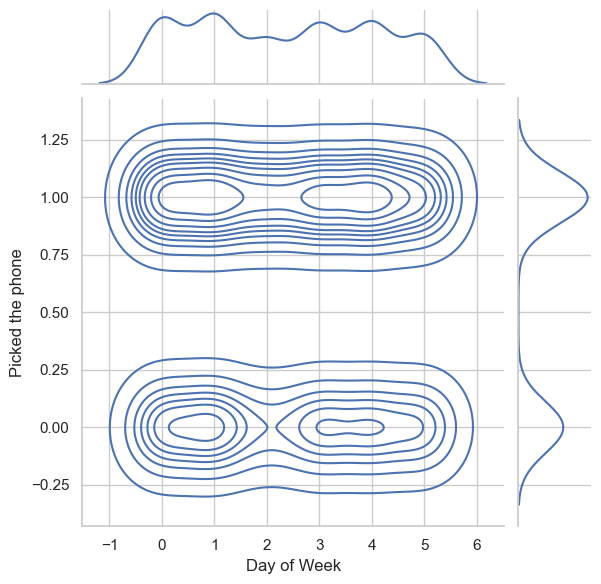

In [28]:
sns.set(style="whitegrid")

sns.jointplot(x='Day of Week', y='Picked the phone', data=df, kind='kde')
plt.show()

In [86]:
# calls_picked_by_day = df[df['Picked the phone'] == 1].groupby('Day of Week').size().reset_index(name='Number of Calls Picked')

# plt.bar(calls_picked_by_day['Day of Week'], calls_picked_by_day['Number of Calls Picked'], color='skyblue')
# plt.xlabel('Day of the Week')
# plt.ylabel('Number of Calls Picked')
# plt.title('Number of Calls Picked by Day of the Week')
# plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# plt.show()

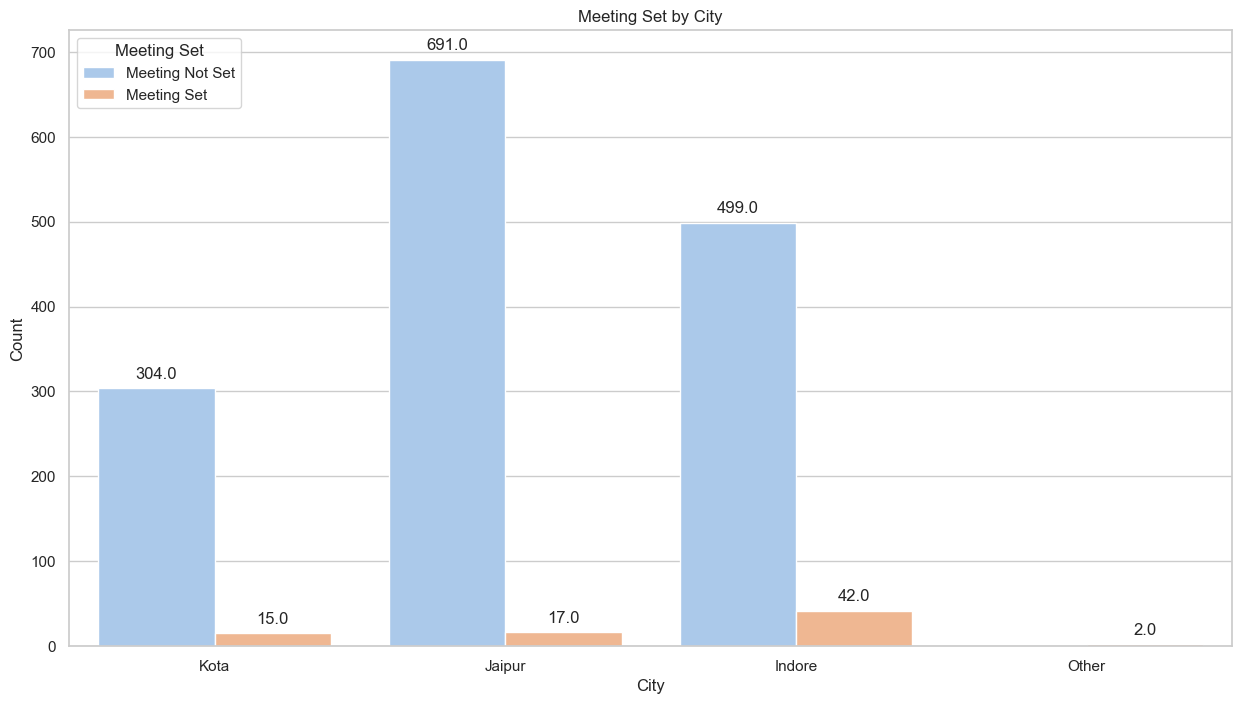

In [223]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='City', hue='meeting_exists', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Meeting Set by City')
plt.legend(title='Meeting Set', labels=['Meeting Not Set', 'Meeting Set'])
plt.show()

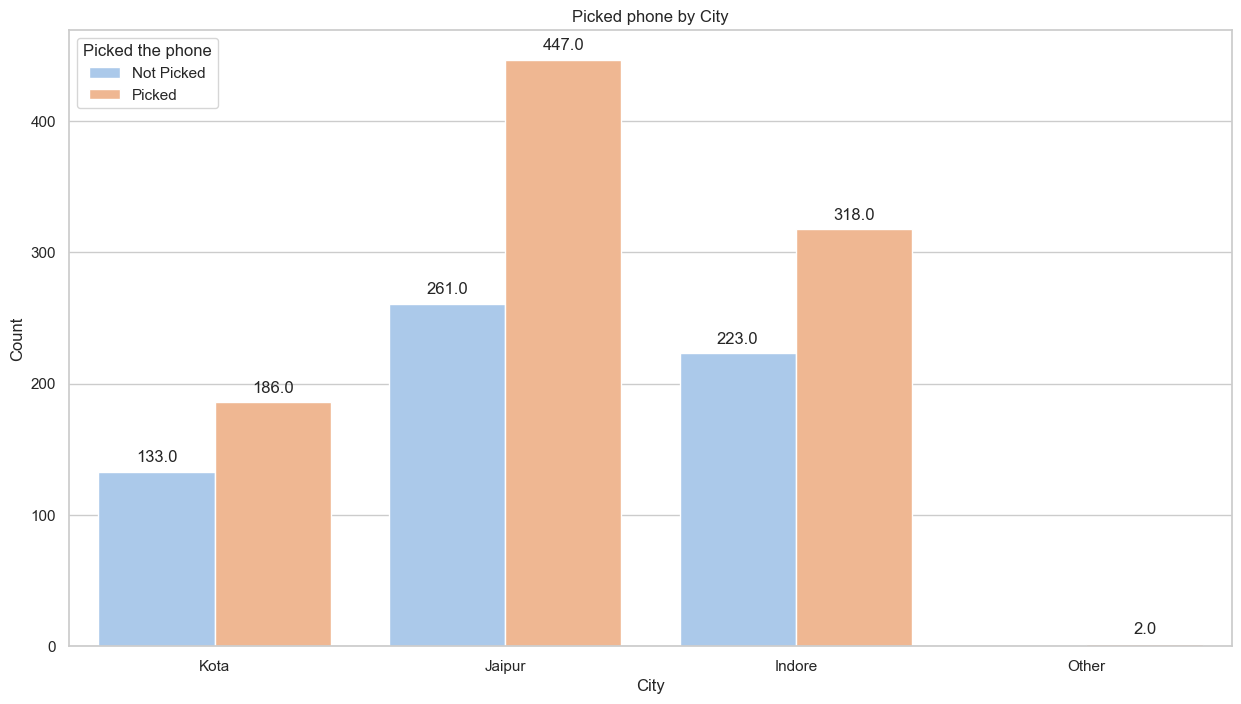

In [224]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='City', hue='Picked the phone', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Picked phone by City')
plt.legend(title='Picked the phone', labels=['Not Picked', 'Picked'])
plt.show()

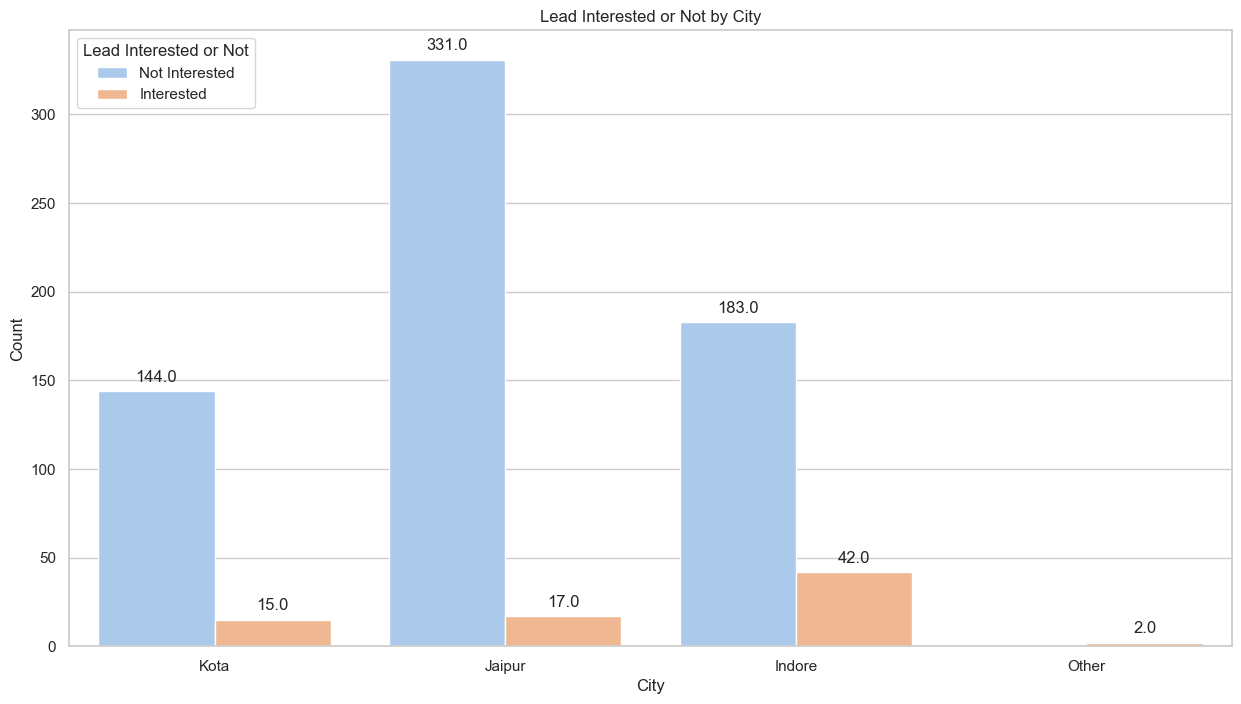

In [225]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='City', hue='Lead Interested or Not', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Lead Interested or Not by City')
plt.legend(title='Lead Interested or Not', labels=['Not Interested', 'Interested'])
plt.show()

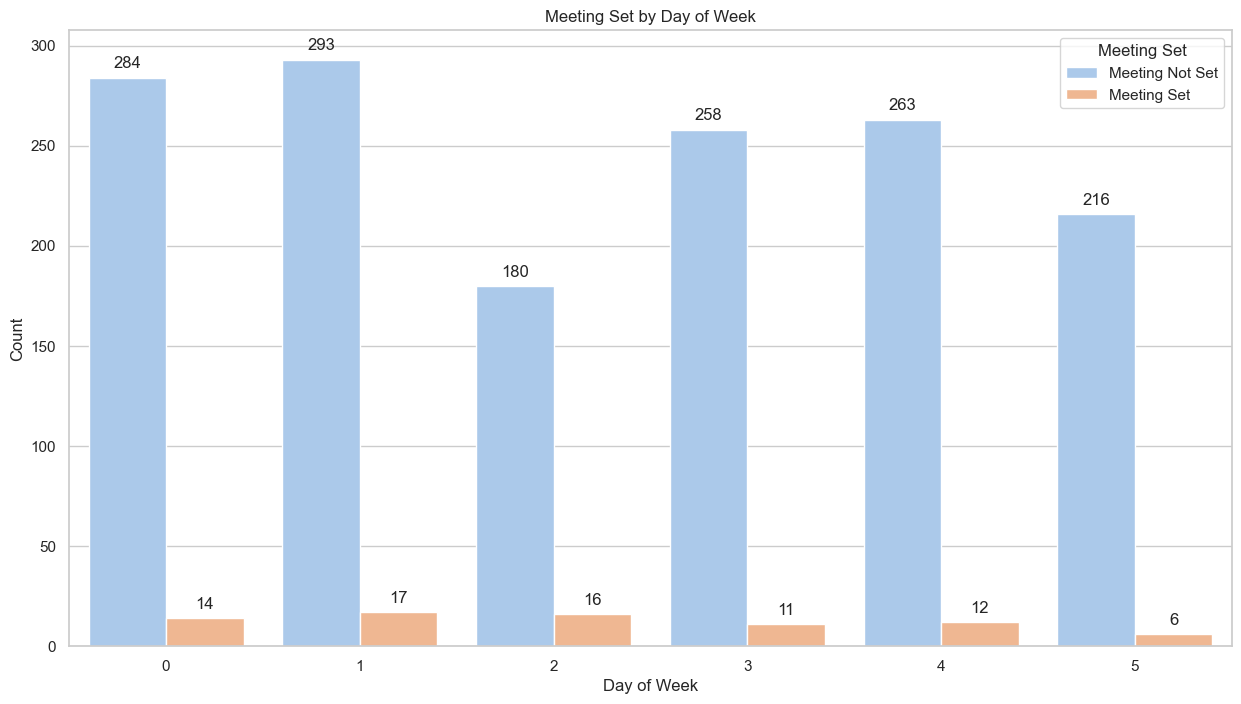

In [221]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Day of Week', hue='meeting_exists', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Meeting Set by Day of Week')
plt.legend(title='Meeting Set', labels=['Meeting Not Set', 'Meeting Set'])
plt.show()

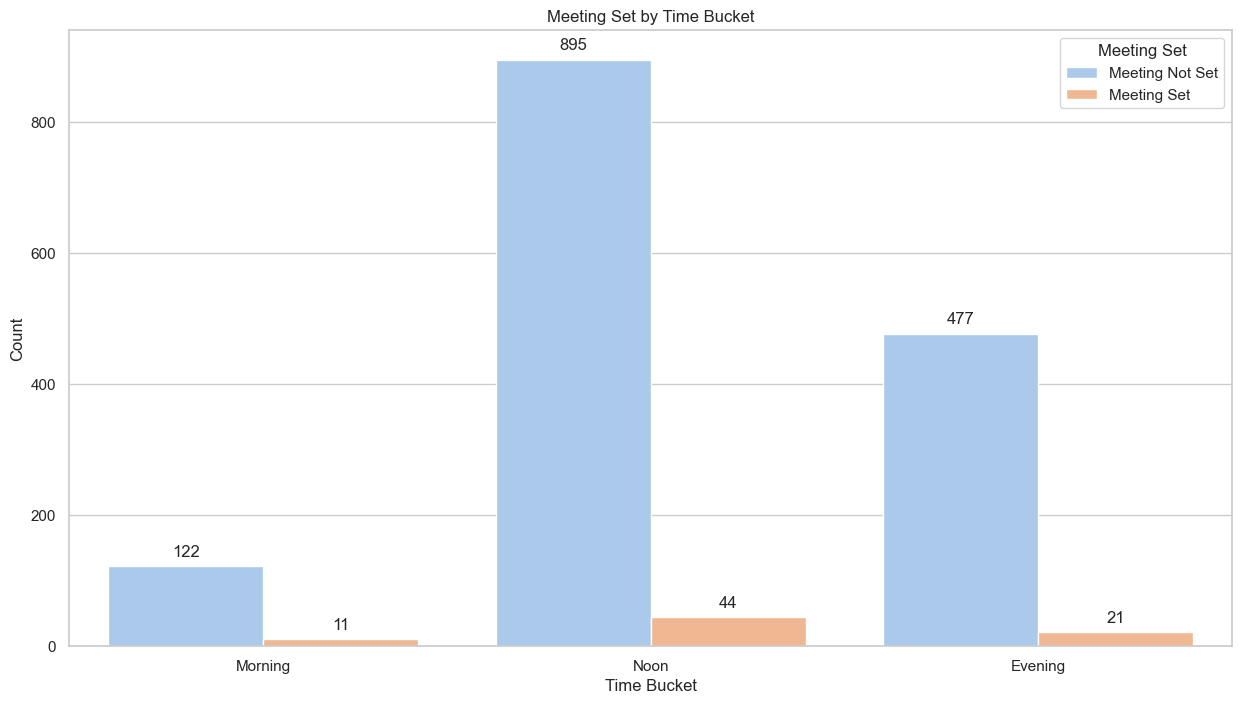

In [222]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Time_Bucket', hue='meeting_exists', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Time Bucket')
plt.ylabel('Count')
plt.title('Meeting Set by Time Bucket')
plt.legend(title='Meeting Set', labels=['Meeting Not Set', 'Meeting Set'])
plt.show()

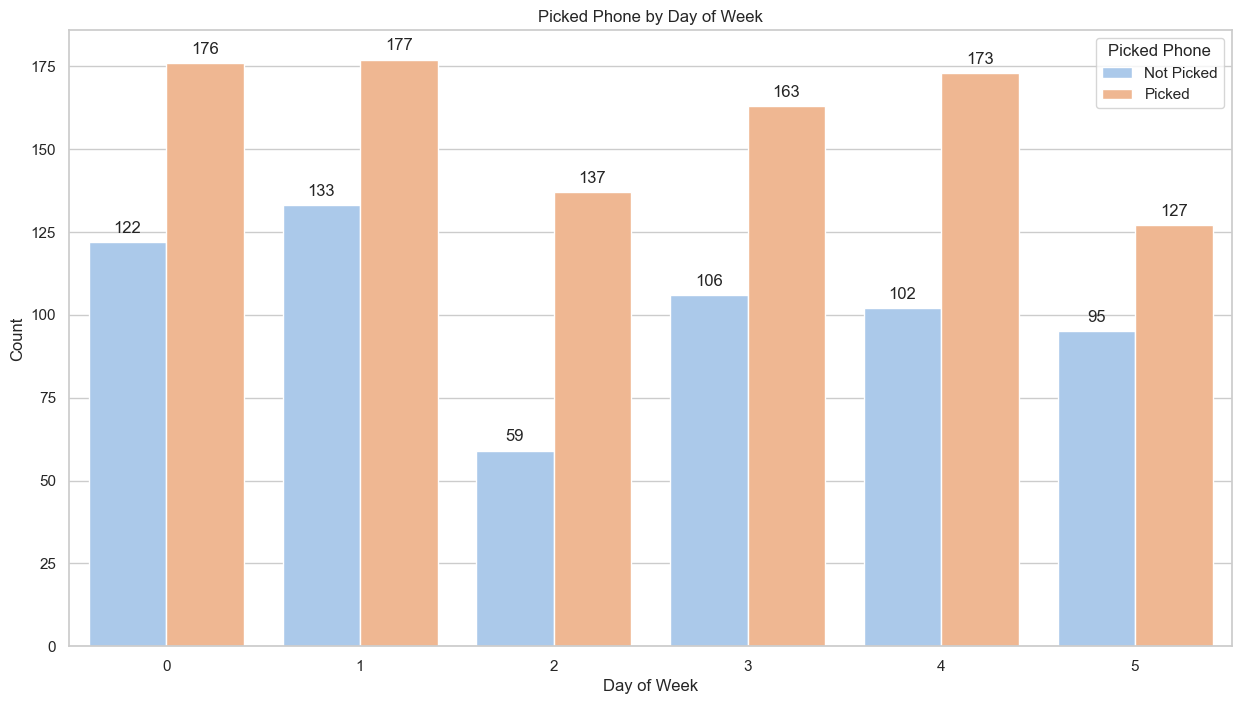

In [220]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Day of Week', hue='Picked the phone', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Picked Phone by Day of Week')
plt.legend(title='Meeting Set', labels=['Meeting Not Set', 'Meeting Set'])
plt.show()

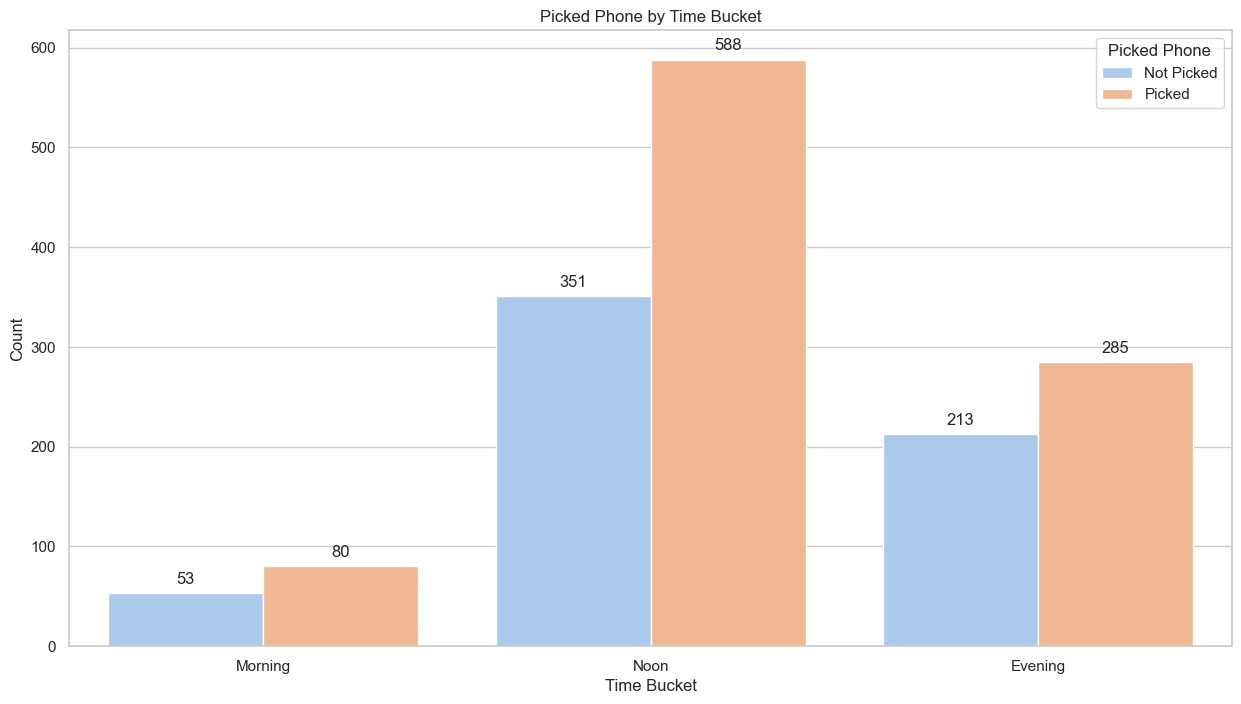

In [219]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Time_Bucket', hue='Picked the phone', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Time Bucket')
plt.ylabel('Count')
plt.title('Picked Phone by Time Bucket')
plt.legend(title='Picked Phone', labels=['Not Picked', 'Picked'])
plt.show()

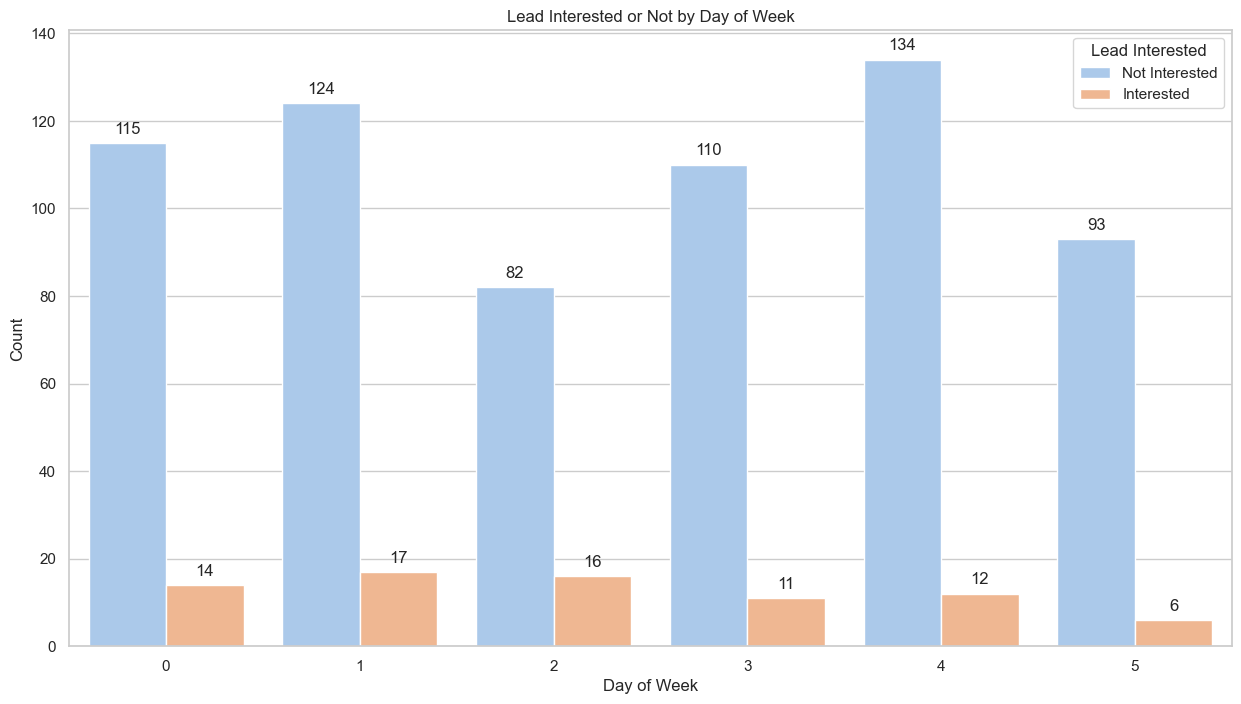

In [216]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Day of Week', hue='Lead Interested or Not', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Lead Interested or Not by Day of Week')
plt.legend(title='Lead Interested', labels=['Not Interested', 'Interested'])
plt.show()

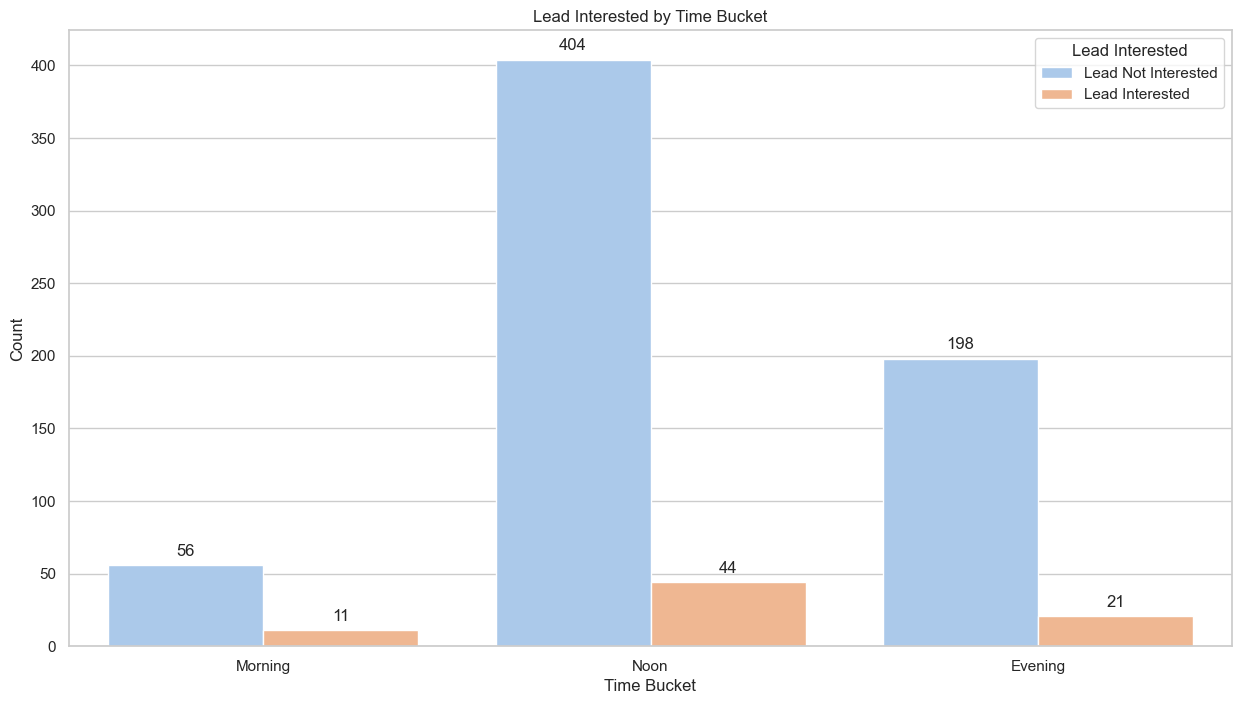

In [217]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Time_Bucket', hue='Lead Interested or Not', data=df, palette='pastel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Time Bucket')
plt.ylabel('Count')
plt.title('Lead Interested by Time Bucket')
plt.legend(title='Lead Interested', labels=['Lead Not Interested', 'Lead Interested'])
plt.show()

In [208]:
# calls_picked_by_day = df[df['Picked the phone'] == 1].groupby('Time_Bucket').size().reset_index(name='Number of Calls Picked')

# plt.bar(calls_picked_by_day['Time_Bucket'], calls_picked_by_day['Number of Calls Picked'], color='skyblue')
# plt.xlabel('Time_Bucket')
# plt.ylabel('Number of Calls Picked')
# plt.title('Number of Calls Picked by Time_Bucket')
# plt.xticks(range(3), ['Morning', 'Noon', 'Evening'])
# plt.show()

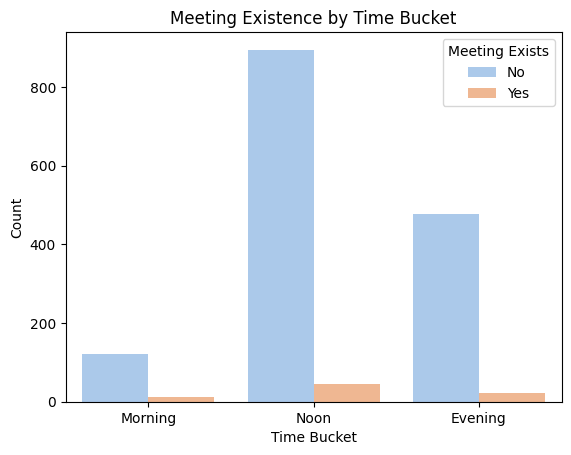

In [179]:
sns.countplot(x='Time_Bucket', hue='meeting_exists', data=df, palette='pastel')
plt.xlabel('Time Bucket')
plt.ylabel('Count')
plt.title('Meeting Existence by Time Bucket')
plt.legend(title='Meeting Exists', labels=['No', 'Yes'])
plt.show()

In [209]:
# df_meeting_exists_1 = df[df['meeting_exists'] == 1]

# sns.countplot(x='Time_Bucket', data=df_meeting_exists_1, palette='pastel')
# plt.xlabel('Time Bucket')
# plt.ylabel('Count')
# plt.title('Distribution of Meeting Existence (meeting_exists = 1) by Time Bucket')
# plt.show()

In [ ]:
## Changing the names of the columns in the data to desired values

names=[]
columns=data.iloc[1]
for i in columns:
    names.append(i)
    
data = pd.read_excel("C:/Users/Sukriti Macker/All Internship Works/Peacock Solar/Peacock Solar Data Analytics Intern/Telemarketing.xlsx", names=names)

### Data Manipulation

In [ ]:
data.drop(labels=[0,1],axis=0,inplace=True)  # Dropping Unnamed Columns 

In [ ]:
data.reset_index(drop=True,inplace=True)  # Reseting the Index Values

In [ ]:
data.head(4)

#### Analyzing the Data for NULL Values

In [ ]:
sns.heatmap(data.isnull(), cbar = False)

In [ ]:
data.info()

In [ ]:
## Dropping the Columns that have nearly null or null values

data.drop(labels=['Timestamp',"Reason Why Phone is not picked",'Lead Name','Lead Validation','Picked the phone','Email (Optional)','Insert Meeting Date & Time Slot','Please state the major highlights of the call.'],axis=1,inplace=True)
data

#### Filling NA or NULL values using Mean, Median or Mode

In [ ]:
#data.dropna(subset = ["Calling Date & Time","City","Lead Interested or Not","Select the Reason"], inplace=True ,axis=1)
data["Lead Interested or Not"]=data["Lead Interested or Not"].fillna(data["Lead Interested or Not"].mode()[0])
data["Calling Date & Time"]=data["Calling Date & Time"].fillna(data["Calling Date & Time"].mode()[0])
data["City"]=data["City"].fillna(data["City"].mode()[0])
data["Select the Reason"]=data["Select the Reason"].fillna(data["Select the Reason"].mode()[0])
data

#### Observing the values of the columns reamaining

In [ ]:
data.info()

In [ ]:
data

In [ ]:
#data.to_excel("Telemarketing data.xlsx")

## Separating the data wherein the customer is a potential lead or not

#### Based On City

In [ ]:
city_list=data['City'].to_list()
city=tuple(city_list)
city

In [ ]:
lead_list=data['Lead Interested or Not'].to_list()
lead=tuple(lead_list)
lead

In [ ]:
nos={}
yes={}


for i,j in zip(city,lead):
    if j=='No':
        if i in nos:
            nos[i]+=1
        else:
            nos[i]=1
            
    if j=='Yes':
        if i in yes:
            yes[i]+=1
        else:
            yes[i]=1

In [ ]:
yes

In [ ]:
nos

In [ ]:
#pie chart for yes values
sizes=yes.values()
labels=yes.keys()
plt.pie(sizes,labels=labels,autopct="%.2f%%")
plt.axis("equal")
plt.legend(loc="upper right",bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#pie chart for nos values
sizes=nos.values()
labels=nos.keys()
plt.pie(sizes,labels=labels,autopct="%.2f%%")
plt.axis("equal")
plt.legend(loc="upper right",bbox_to_anchor=(1,1.2))
plt.show()

#### Based On Calling Time of the Executive to the Customer

In [ ]:
#splitting call date and time
def f(date_time):
    
    hours = date_time.strftime('%H')
    minutes = date_time.strftime('%M')
    time=hours+minutes
    return(int(time))
    
    
data['Call Time']=data['Calling Date & Time'].apply(f)
data['Call Time']

In [ ]:
t_list=data['Call Time'].to_list()
t_tuple=tuple(t_list)

timeNo={}
timeYes={}

for i,j in zip(t_tuple,lead):
    if j=='No':
        if i in timeNo:
            timeNo[i]+=1
        else:
            timeNo[i]=1
            
    if j=='Yes':
        if i in timeYes:
            timeYes[i]+=1
        else:
            timeYes[i]=1

In [ ]:
##TWO HOURS SLOTS
#slot 1-> 10-12
#slot 2-> 12-2
#slot 3-> 2-4
#slot 4-> 4-6

slot1=[]
slot2=[]
slot3=[]
slot4=[]

slot1Y=[]
slot2Y=[]
slot3Y=[]
slot4Y=[]

#FOR NOS:-
for i in timeNo.keys():
    if i<=1200 and i>=1000:
        slot1.append(timeNo[i])
        
    elif i<=1400 and i>=1201:
        slot2.append(timeNo[i])
        
    elif i<=1600 and i>=1401:
        slot3.append(timeNo[i])
        
    elif i<=1800 and i>=1601:
        slot4.append(timeNo[i])
        
        
#FOR YES:-
for i in timeYes.keys():
    if i<=1200 and i>=1000:
        slot1Y.append(timeYes[i])
        
    elif i<=1400 and i>=1201:
        slot2Y.append(timeYes[i])
        
    elif i<=1600 and i>=1401:
        slot3Y.append(timeYes[i])
        
    elif i<=1800 and i>=1601:
        slot4Y.append(timeYes[i])

In [ ]:
x1=sum(slot1)
x2=sum(slot2)
x3=sum(slot3)
x4=sum(slot4)

no_list_sum_slotwise=[x1,x2,x3,x4]

x1Y=sum(slot1Y)
x2Y=sum(slot2Y)
x3Y=sum(slot3Y)
x4Y=sum(slot4Y)

yes_list_sum_slotwise=[x1Y,x2Y,x3Y,x4Y]

In [ ]:
no_of_timeslots=np.arange(0,4,1)

In [ ]:
slot_list=["Slot1(10pm-12pm)","Slot2(12pm-2pm)","Slot3(2pm-4pm)","Slot4(4pm-6pm)"]

In [ ]:
plt.xlabel("Time Slots of Calling")
plt.ylabel("Number of Calls")
plt.xticks(no_of_timeslots,slot_list,rotation=40)
plt.bar(no_of_timeslots,no_list_sum_slotwise,width=0.3, color="blue",label="Number of NOs")
plt.bar(no_of_timeslots+0.3,yes_list_sum_slotwise,width=0.3,color="red",label="Number of YESs")
plt.legend()
plt.title("Comparison of whether the LEAD is interested or not based on CALLING TIME for a Demo")
plt.show()

In [ ]:
plt.plot(no_of_timeslots,yes_list_sum_slotwise,label="Number of YESs")
plt.xlabel("Time Slots of Calling")
plt.title("CALLING TIME where the LEAD is INTERESTED for a Demo")
plt.ylabel("Number of Calls")
plt.xticks(no_of_timeslots,slot_list,rotation=40)
plt.legend()
plt.show()

In [ ]:
plt.plot(no_of_timeslots,no_list_sum_slotwise,label="Number of NOs")
plt.xlabel("Time Slots of Calling")
plt.title("CALLING TIME where the LEAD is NOT INTERESTED for a Demo")
plt.ylabel("Number of Calls")
plt.xticks(no_of_timeslots,slot_list,rotation=40)
plt.legend()
plt.show()

#### Based On Reasons Given By the Customers

In [ ]:
def r(var):
    if "used" in var:
        return var.replace(var,"Already Using Solar")
    elif "rent" in var:
        return var.replace(var,"Rented Property")
    elif "rented" in var:
        return var.replace(var,"Rented Property")
    elif "Rent" in var:
        return var.replace(var,"Rented Property")
    elif "Rented" in var:
        return var.replace(var,"Rented Property")
    elif "call" in var:
        return var.replace(var,"Interested, but later")
    elif "money" in var:
        return var.replace(var,"High cost of Solar Power Systems")
    else:
        return var

In [ ]:
data['Reasons']=data['Select the Reason'].apply(r)

In [ ]:
reason_list=data['Reasons'].to_list()
reasons=tuple(reason_list)

In [ ]:
reason_for_no={}
reason_for_yes={}

In [ ]:
for i,j in zip(reasons,lead):
    
    if j=="No":
        if i in reason_for_no:
            reason_for_no[i]+=1
        else:
            reason_for_no[i]=1


    elif j=="Yes":
        if i in reason_for_yes:
            reason_for_yes[i]+=1
        else:
            reason_for_yes[i]=1

In [ ]:
misc=0
for i in list(reason_for_no):
    if reason_for_no[i]<=1:
        misc+=1
        reason_for_no.pop(i)
reason_for_no['Miscellaneous Reasons']=misc

In [ ]:
reason_for_no

In [ ]:
reason_for_yes

In [ ]:
#Pie chart for no vs yes
no=int(sum(reason_for_no.values()))
yes=int(sum(reason_for_yes.values()))


sizes=[no,yes]
labels=["Customer Declining", "Customer Agreeing"]
plt.title("Number of Customers Agreeing and Disagreeing for a Demo based on Reasons recorded by Telemarketing Team")
explode=[0,0.4]
plt.pie(sizes,labels=labels,autopct="%.1f%%", shadow = True,explode=explode)
plt.show()

In [ ]:
xaxis=np.arange(len(reason_for_no.keys()))
xaxis

In [ ]:
#explode=[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [ ]:
#Reasons for declining
size=[]
label=[]
for i in reason_for_no.values():
    size.append(i)
    
for j in reason_for_no.keys():
    label.append(j)

In [ ]:
size,label

In [ ]:
plt.title("Reasons for Customer to decline for the demo")

total=sum(size)



explode=[0.2,0.4,1.1,0.4,0.1,1]
colours=[]
plt.pie(size,explode=explode,autopct="%.1f%%")
plt.legend(labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(label, size)],loc="lower right",bbox_to_anchor=(0, 1.3))

plt.axis('equal')
plt.show()